# Decision Tree 실습

유방암 데이터

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [5]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

In [6]:
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [7]:
from sklearn.metrics import accuracy_score

In [ ]:
# 정확도
pred = model.predict(X_test)
print(model.score(X_train, y_train))
print(accuracy_score(y_test, pred))

In [8]:
from sklearn.tree import export_graphviz
import graphviz

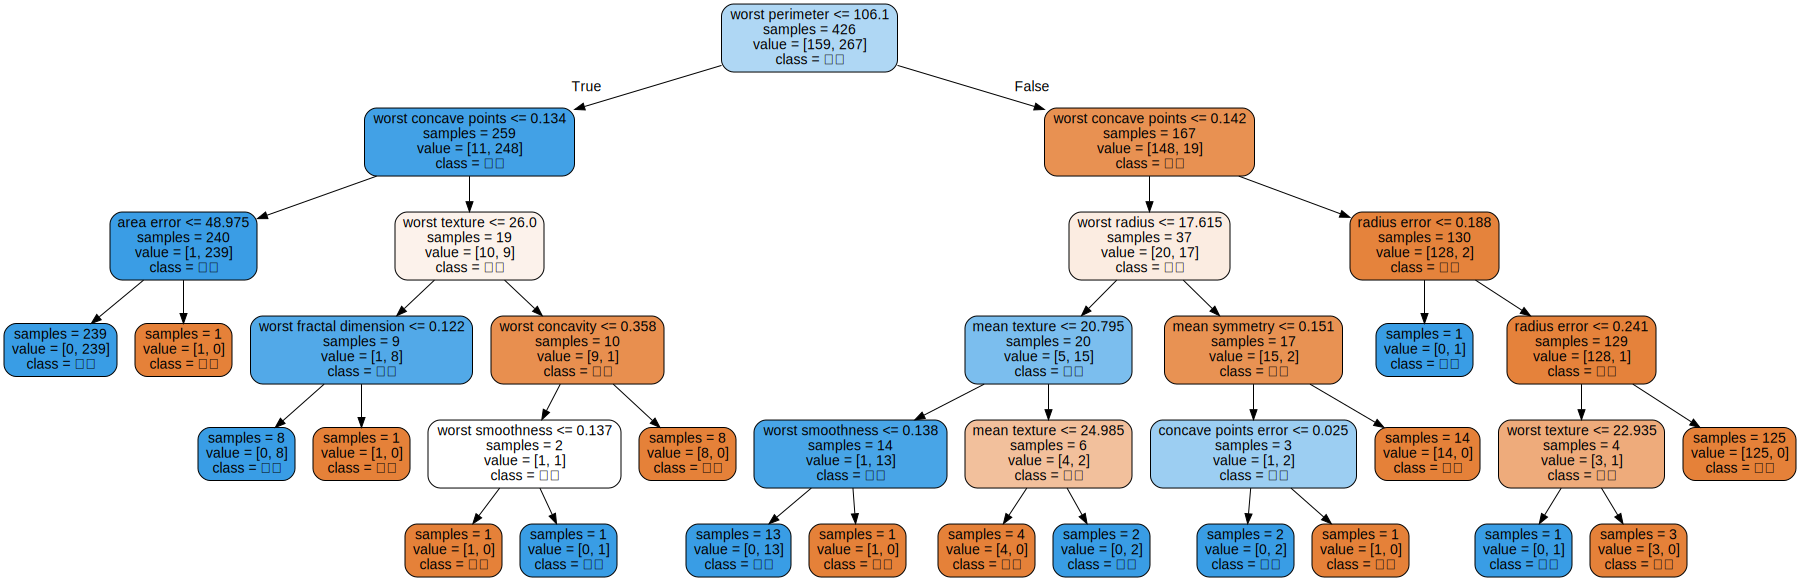

In [11]:
# 결정 트리 시각화
export_graphviz(model, out_file='tree.dot', class_names=['악성', '양성'], feature_names=cancer.feature_names, impurity=False, filled=True, rounded=True)

with open('tree.dot', encoding='utf-8') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

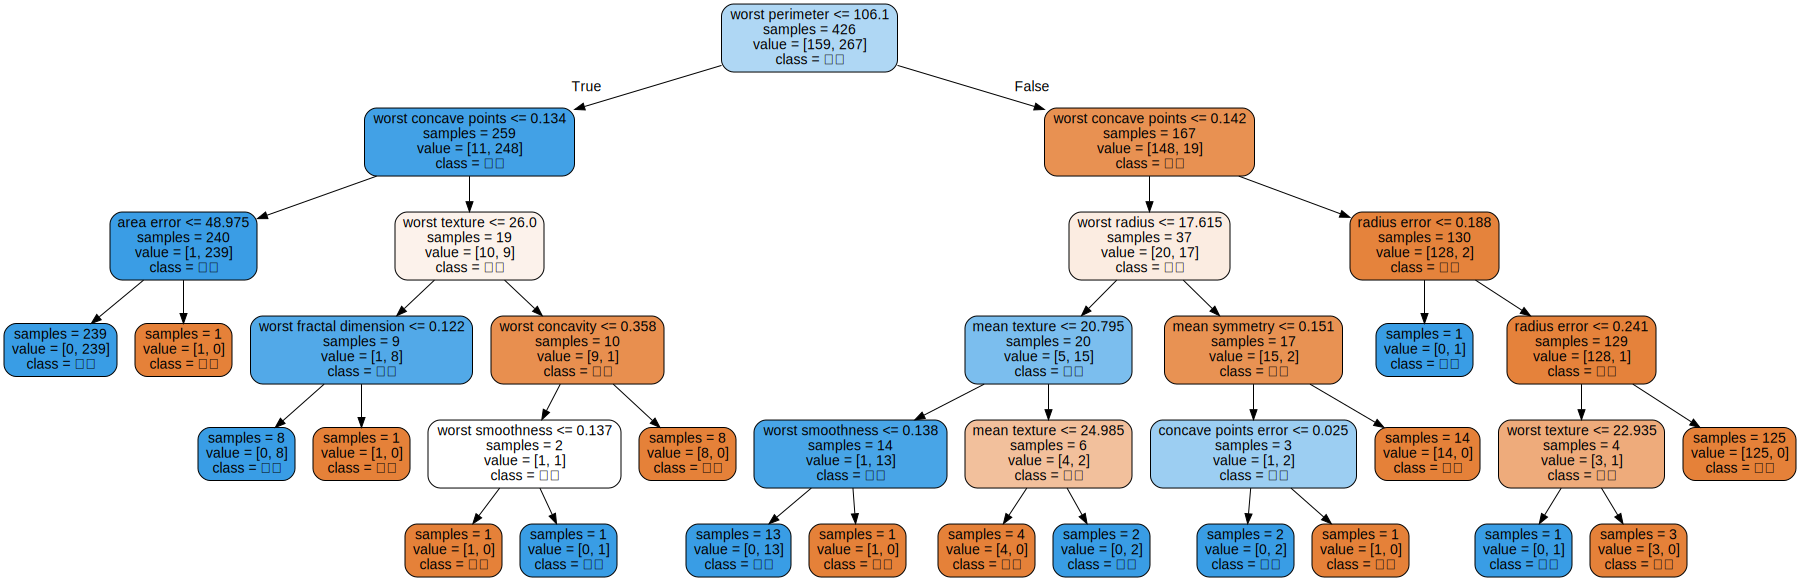

In [12]:
# 결정트리 시각화
# 파일로 저장하지 않고 시각화하는 방법
# out_file=None
dot_graph = export_graphviz(model, out_file=None, class_names=['악성', '양성'], feature_names=cancer.feature_names, impurity=False, filled=True, rounded=True)

display(graphviz.Source(dot_graph))

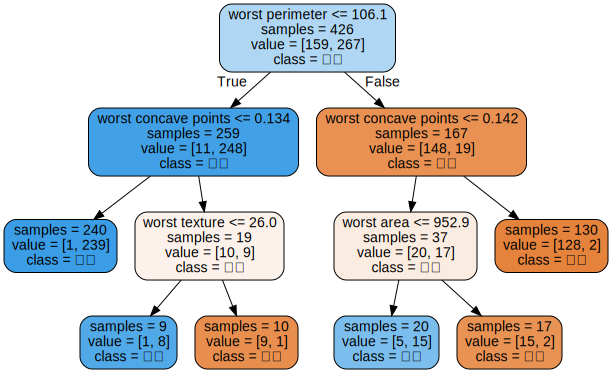

0.971830985915493
0.9370629370629371


In [33]:
# 파라미터들을 조절하면서 정확도가 높은 경우 찾아보기
model = DecisionTreeClassifier(random_state=0, max_leaf_nodes=6)
model.fit(X_train, y_train)

dot_graph = export_graphviz(model, out_file=None, class_names=['악성', '양성'], feature_names=cancer.feature_names, impurity=False, filled=True, rounded=True)

display(graphviz.Source(dot_graph))

pred = model.predict(X_test)
print(model.score(X_train, y_train))
print(accuracy_score(y_test, pred))

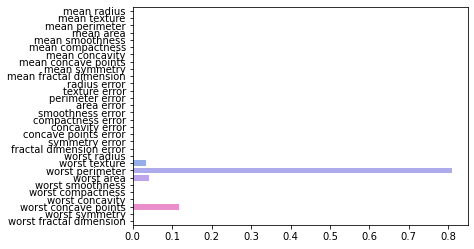

In [34]:
# 특성 중요도 시각화
import seaborn as sns

sns.barplot(x=model.feature_importances_, y=cancer.feature_names)